# Part I - (Loan Data from Prosper)
## by (Ridwan Taiwo)

## Introduction

The dataset used in this project is popularly known as "Loan Data from Prosper". This data consists of 113,937 loan records of individuals. There are 81 features describing the loan data. The most important features are extracted for the purpose of this project.




## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#loading the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')
loan_data.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

There are 81 features in the dataset, which is too much to handle. 15 features that best describe the annual percentage rate and interest rate of the loan would be used.

In [4]:
#getting the column names
loan_data.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [5]:
#removing unnecessary columns or features
loan_data.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'ClosedDate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (Alpha)',
       'ListingCategory (numeric)', 'BorrowerState',
        'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'LoanKey', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
       'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
       'LoanMonthsSinceOrigination', 'LoanNumber', 
       'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey',
       'MonthlyLoanPayment', 'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees',
       'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments', 'PercentFunded',
       'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount',
       'Investors'], axis = 1, inplace=True)

In [6]:
#looking at the dataframe to confirm the removal
loan_data.head()

Term LoanStatus  BorrowerAPR  BorrowerRate  ProsperRating (numeric)  \
0    36  Completed      0.16516        0.1580                      NaN   
1    36    Current      0.12016        0.0920                      6.0   
2    36  Completed      0.28269        0.2750                      NaN   
3    36    Current      0.12528        0.0974                      6.0   
4    36    Current      0.24614        0.2085                      3.0   

   ProsperScore     Occupation     IncomeRange  LoanOriginalAmount  \
0           NaN          Other  $25,000-49,999                9425   
1           7.0   Professional  $50,000-74,999               10000   
2           NaN          Other   Not displayed                3001   
3           9.0  Skilled Labor  $25,000-49,999               10000   
4           4.0      Executive       $100,000+               15000   

   Recommendations  
0                0  
1                0  
2                0  
3                0  
4                0

In [7]:
#changing the name of the dataframe for easy handling
df = loan_data
df

Term              LoanStatus  BorrowerAPR  BorrowerRate  \
0         36               Completed      0.16516        0.1580   
1         36                 Current      0.12016        0.0920   
2         36               Completed      0.28269        0.2750   
3         36                 Current      0.12528        0.0974   
4         36                 Current      0.24614        0.2085   
...      ...                     ...          ...           ...   
113932    36                 Current      0.22354        0.1864   
113933    36  FinalPaymentInProgress      0.13220        0.1110   
113934    60                 Current      0.23984        0.2150   
113935    60               Completed      0.28408        0.2605   
113936    36                 Current      0.13189        0.1039   

        ProsperRating (numeric)  ProsperScore               Occupation  \
0                           NaN           NaN                    Other   
1                           6.0           7.0             Professional   
2                           NaN           NaN                    Other   
3                           6.0           9.0            Skilled Labor   
4                           3.0           4.0                Executive   
...                         ...           ...                      ...   
113932                      4.0           5.0  Food Service Management   
113933                      6.0           8.0             Professional   
113934                      3.0           3.0                    Other   
113935                      4.0           5.0             Food Service   
113936                      6.0           7.0                Professor   

           IncomeRange  LoanOriginalAmount  Recommendations  
0       $25,000-49,999                9425                0  
1       $50,000-74,999               10000                0  
2        Not displayed                3001                0  
3       $25,000-49,999               10000                0  
4            $100,000+               15000                0  
...                ...                 ...              ...  
113932  $50,000-74,999               10000                0  
113933  $75,000-99,999                2000                0  
113934  $25,000-49,999               10000                0  
113935  $25,000-49,999               15000                0  
113936  $50,000-74,999                2000                0  

[113937 rows x 10 columns]

In [8]:
#getting some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Term                     113937 non-null  int64  
 1   LoanStatus               113937 non-null  object 
 2   BorrowerAPR              113912 non-null  float64
 3   BorrowerRate             113937 non-null  float64
 4   ProsperRating (numeric)  84853 non-null   float64
 5   ProsperScore             84853 non-null   float64
 6   Occupation               110349 non-null  object 
 7   IncomeRange              113937 non-null  object 
 8   LoanOriginalAmount       113937 non-null  int64  
 9   Recommendations          113937 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 8.7+ MB


Some columns have null values such as prosperrating, prosper score etc. It is better to remove the null rows for further analysis.

In [9]:
#dropping all rows with null values
df.dropna(inplace=True)

In [10]:
#getting the summary statistics
df.describe()

Term   BorrowerAPR  BorrowerRate  ProsperRating (numeric)  \
count  83520.00000  83520.000000  83520.000000             83520.000000   
mean      42.51523      0.226863      0.196257                 4.071839   
std       11.66907      0.080115      0.074807                 1.675900   
min       12.00000      0.045830      0.040000                 1.000000   
25%       36.00000      0.163280      0.135900                 3.000000   
50%       36.00000      0.219450      0.187500                 4.000000   
75%       60.00000      0.292540      0.257400                 5.000000   
max       60.00000      0.423950      0.360000                 7.000000   

       ProsperScore  LoanOriginalAmount  Recommendations  
count  83520.000000        83520.000000     83520.000000  
mean       5.964966         9103.743427         0.017816  
std        2.375933         6300.856735         0.189383  
min        1.000000         1000.000000         0.000000  
25%        4.000000         4000.000000         0.000000  
50%        6.000000         7500.000000         0.000000  
75%        8.000000        14000.000000         0.000000  
max       11.000000        35000.000000        19.000000

### What is the structure of your dataset?

> The original data consists of 113,937 records of loan described by 81 features. However, the 10 most important features have been selected for this project. 

### What is/are the main feature(s) of interest in your dataset?

> My feature of interest is annual percentage rate (APR). I want to know the influence of the other 9 features on the APR.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> This can be done by exploring the relationship between APR and other 9 features such as term, propsperrating, prosperscore, etc. 


## Univariate Exploration



#### Question - What is the distribution of the main variable (i.e., APR)?

In [11]:
###Visualization 

bins = np.arange(0, df['BorrowerAPR'].max()+0.03, 0.01)
plt.figure(figsize = [8, 6])
plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
plt.ylabel('Frequency')
plt.xlabel('Borrower APR')
plt.title('Distribution of Borrower APR');

#### Observation
The distribution of the data is multimodal as it contains different peaks. The highest peak lies between 0.35 and 0.36. This suggests that the APR of most of the data is between 35-36%. 

#### Question - What is the distribution of the occupation of the borrowers?

In [12]:
df['Occupation'].value_counts()

Other                          21317
Professional                   10542
Executive                       3468
Computer Programmer             3236
Teacher                         2888
                               ...  
Judge                             22
Student - College Freshman        17
Student - College Sophomore       16
Student - Community College       10
Student - Technical School         2
Name: Occupation, Length: 67, dtype: int64

This shows that there are 67 occupation types in the data. I will only be showing the top 30 for easy visualization.

In [13]:
#visualisation
plt.figure(figsize=(10,8))
occ = df['Occupation'].value_counts().nlargest(30)
del occ['Other'] #remove "other" from the list
occ.plot(kind = 'barh', color = 'brown')
plt.xlabel('Frequency')
plt.ylabel('Occupation')
plt.title('Distribution of borrowers occupation')
plt.show();

Compare to other occupations, professional, computer programmer, executive, teacher, and administrative assistant are most likely to apply for loans. 

### Question - What is the income range of the borrowers?

In [14]:
df['IncomeRange'].value_counts()

$50,000-74,999    25293
$25,000-49,999    23574
$100,000+         15166
$75,000-99,999    14401
$1-24,999          4392
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64

In [15]:
#reorder the incomerange column from low income to high income
income_range = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
income_class = pd.api.types.CategoricalDtype(ordered=True, categories=income_range)
df['IncomeRange'] = df['IncomeRange'].astype(income_class)

In [16]:
#visualisation
plt.figure(figsize=(20,6))
color = sns.color_palette()[1]
sns.countplot(data = df, x='IncomeRange', color=color)
plt.ylabel('Frequency')
plt.xlabel('Income Range')
plt.title('Distribution of borrowers income range');

#### Observation
The income of most of the borrowers range between 25,000-49,999 followed by 50,000-74,999.

It is noted that the number of borrowers increases as their income increase untill it gets to 25,000-49,999 and then decreases. This may indicate that people with 25,000-49,999 income range are in the middle class.

### Question - What is the distribution of the original loan amount?

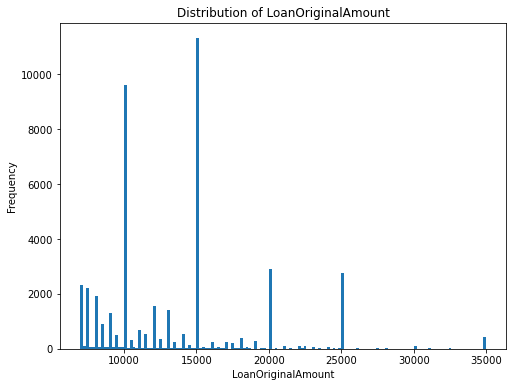

In [17]:
###Visualization 

bins = np.arange(7000, df['LoanOriginalAmount'].max()+200, 200)
plt.figure(figsize = [8, 6])
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
plt.ylabel('Frequency')
plt.xlabel('LoanOriginalAmount')
plt.title('Distribution of LoanOriginalAmount');

It is noticed that the frequency at 15,000 is the highest followed by 10,000. Very few people request for 30,000 and above loan. 

### Question - Which term has the highest loan records and what is the dominant prosper rating?

In [18]:
df['ProsperRating (numeric)'].value_counts()

4.0    17956
5.0    15329
6.0    14337
3.0    14081
2.0     9621
1.0     6878
7.0     5318
Name: ProsperRating (numeric), dtype: int64

In [19]:
#rename some of the columns for easy handling
df.rename(columns ={'BorrowerAPR' : 'APR', 'BorrowerRate': 'InterestRate', 'ProsperRating (numeric)' :'ProsperRating', 'LoanOriginalAmount': 'LoanAmount'}, inplace=True)
df.head()

Term LoanStatus      APR  InterestRate  ProsperRating  ProsperScore  \
1    36    Current  0.12016        0.0920            6.0           7.0   
3    36    Current  0.12528        0.0974            6.0           9.0   
4    36    Current  0.24614        0.2085            3.0           4.0   
5    60    Current  0.15425        0.1314            5.0          10.0   
6    36    Current  0.31032        0.2712            2.0           2.0   

       Occupation     IncomeRange  LoanAmount  Recommendations  
1    Professional  $50,000-74,999       10000                0  
3   Skilled Labor  $25,000-49,999       10000                0  
4       Executive       $100,000+       15000                0  
5    Professional       $100,000+       15000                0  
6  Sales - Retail  $25,000-49,999        3000                0

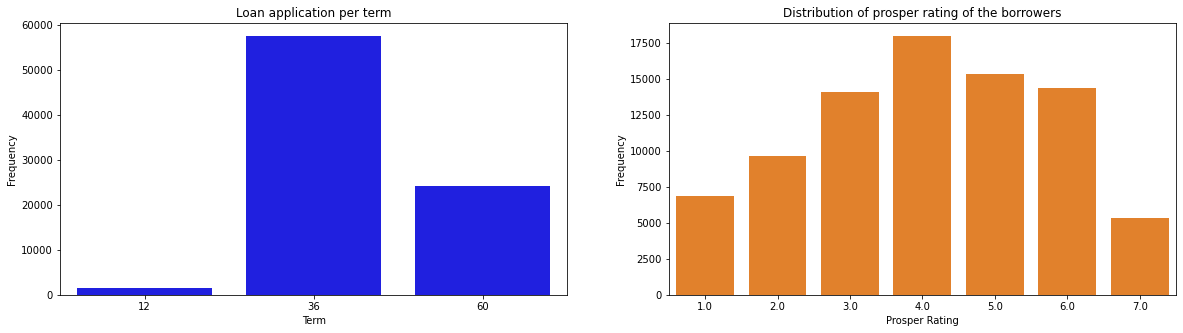

In [20]:
#visualization
plt.figure(figsize = [20, 5]) 

plt.subplot(1, 2, 1)
sns.countplot(data = df, x='Term', color='b')
plt.ylabel('Frequency')
plt.xlabel('Term')
plt.title('Loan application per term');

plt.subplot(1, 2, 2)
color = sns.color_palette()[1]
sns.countplot(data = df, x='ProsperRating', color=color)
plt.ylabel('Frequency')
plt.xlabel('Prosper Rating')
plt.title('Distribution of prosper rating of the borrowers');

#### Observation
The results show that most of the loans were made for 36 months and the prosper ratings of the borrowers follows a normal distribution.

In [21]:
df['LoanStatus'].value_counts()

Current                   55272
Completed                 19651
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        798
Past Due (31-60 days)       358
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       264
FinalPaymentInProgress      203
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of the APR variable, which s the main variable of interest, appears to be multimodal, as it has different peak values. There was no need for transformation, as most of the values lie between 0 to 0.4, which can be easily visualized.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was no need for performing transformation. The distributions were easily visualized. The names of some columns were changed to facilitate easy handling.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Question - What is the relationship between APR, InterestRate, and Loan Amount?

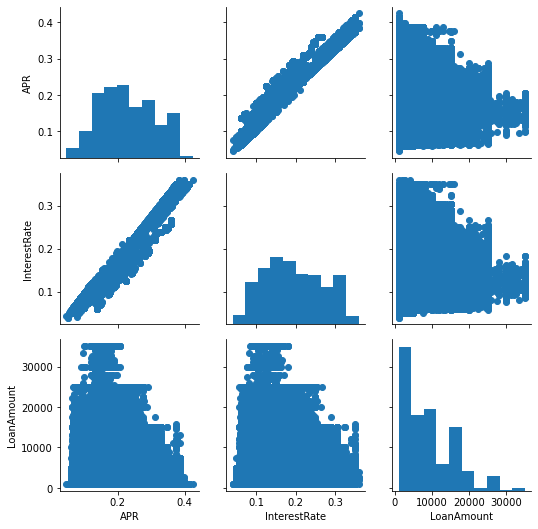

In [22]:
#visualizaton
#plotting pair grids
g = sns.PairGrid(data = df, vars = ['APR', 'InterestRate', 'LoanAmount'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

#### Observation

The result shows that there is a strong positive correlation between APR and Interest Rate. This means the more the interest rate, the more the APR. This is expected since APR is all charges incurred for securing a loan including the interest rate. The correlation between APR and Loan Amount seems to be negative (the chart does not clearly show that). I will use correlation matrix to figure this out. 

### Question - Find the correlation coeficient of the APR, InterestRate and Loan Amount

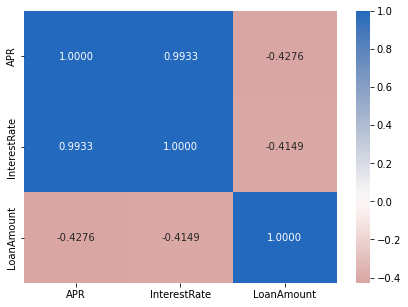

In [23]:
#visualization
#plotting a correlation matrix to generate the Pearson coeffients
plt.figure(figsize = [7, 5])
L1 = ['APR', 'InterestRate', 'LoanAmount']
sns.heatmap(df[L1].corr(), annot = True, fmt = '.4f',
           cmap = 'vlag_r', center = 0);

#### Observation
This confirms my previous observation that APR is strongly correlated with InterestRate (r = 0.993). Moreover, APR is negatively correlated with LoanAmount (r= -0.428). This is intuitively okay since huge amount of loan should attract lesser APR. 

### Question - Find the relationship between APR, prosper rating, prosper score, and reccomendations

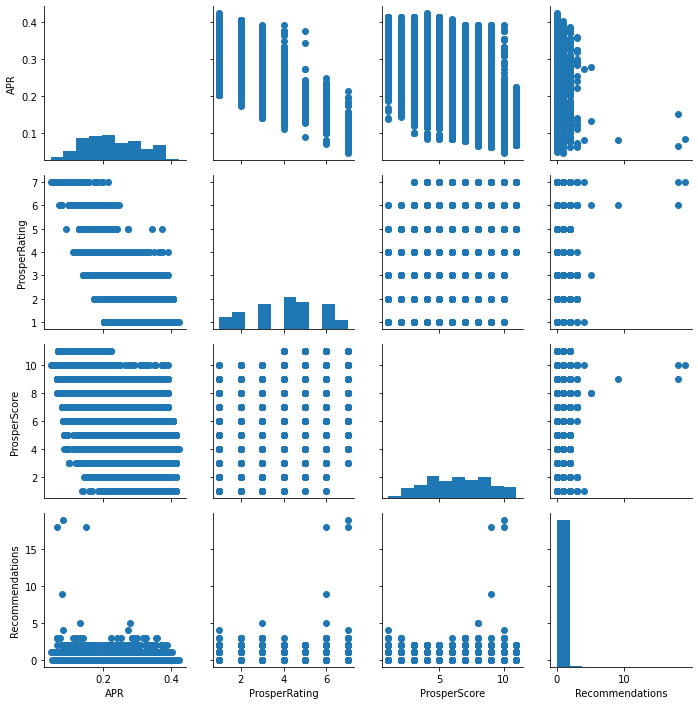

In [24]:
#visualizaton
#plotting pair grids
g = sns.PairGrid(data = df, vars = ['APR', 'ProsperRating', 'ProsperScore', 'Recommendations'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

#### Observation
The plots depict that there are negative correlation between APR and Prosper Score and Prosper Rating. However, the relationship between APR and Reccomendations is not clearly depicted by the plot. This will be done by plotting the correlation matrix. 

### Question - Find the correlation coeficient between the APR, ProsperRating, ProsperScore, and Recommendations

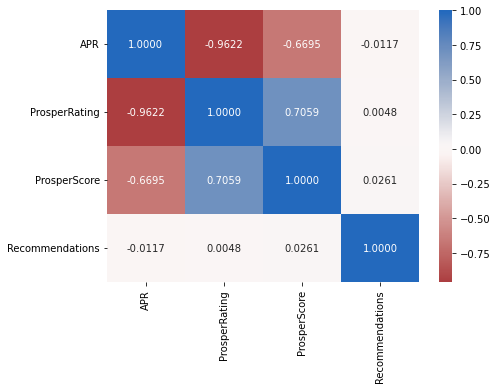

In [25]:
#plotting a correlation matrix to generate the Pearson coeffients
plt.figure(figsize = [7, 5])
L1 = ['APR', 'ProsperRating', 'ProsperScore', 'Recommendations']
sns.heatmap(df[L1].corr(), annot = True, fmt = '.4f',
           cmap = 'vlag_r', center = 0);

#### Observation

The results confirm the observation made above. It shows that APR is negatively correlated with prosper rating, prosper score, and recommendations. 

These observations make sense since APR of borrowers that have low risk (i.e., high rating and score) are expected to be low. The same judgement is applicable to recommendations.

In [26]:
df.head(1)

Term LoanStatus      APR  InterestRate  ProsperRating  ProsperScore  \
1    36    Current  0.12016         0.092            6.0           7.0   

     Occupation     IncomeRange  LoanAmount  Recommendations  
1  Professional  $50,000-74,999       10000                0

### Question - What is the relationship between some of the numerical variables and term & income range (i.e., the categorical variables)?

In [27]:
Categorical_var = ['Term', 'IncomeRange']
Numerical_var = ['APR', 'LoanAmount', 'ProsperRating', 'ProsperScore']

In [28]:
#visualization
#plotting a boxgrid to show the relationship
plt.figure(figsize = [20, 15])
def boxgrid(x, y, **kwargs):
    color = sns.color_palette()[2] #selecting the third color
    sns.boxplot(x, y, color = color)
g = sns.PairGrid(data = df, x_vars = Categorical_var, y_vars = Numerical_var, size = 3, aspect = 1.5)
g.map(boxgrid)
plt.xticks(rotation=15);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, 

<Figure size 1440x1080 with 0 Axes>

#### Observation
This result shows that APR reduces with term. This means loan with longer term will attract lesser APR. It is also noticed that the loan amount increases with income range. This is reasonable as peopele with higher income rate should have low risk, hence, they should be able to pay back the loan easily. This observation is confirmed by the relationship between prosper score, prosper rating and income range : the more the income the more the prosper score and prosper rating. However, there is a suprising relationship between prosper rating, prosper score and term. Prosper score increases with term, while prosper rating reduces with term. This is suprising as prosper rating and prosper score measures almost the same thing : risk level of borrowers. 

### Question - Find the relationship between APR and loan status

In [29]:
df['LoanStatus'].value_counts()

Current                   55272
Completed                 19651
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        798
Past Due (31-60 days)       358
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       264
FinalPaymentInProgress      203
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [30]:
#reorder the loan status column from completed to past dues
loan_status = ['Current', 'Completed', 'Chargedoff', 'Defaulted', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 
               'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)']
loan_class = pd.api.types.CategoricalDtype(ordered=True, categories=loan_status)
df['LoanStatus'] = df['LoanStatus'].astype(loan_class)

In [31]:
#visualization
plt.figure(figsize = [25, 5])
sns.violinplot(data = df, x = 'LoanStatus', y= 'APR', color = color)
plt.title('Distribution of APR versus Loan Status')
plt.xlabel ('Loan Status')
plt.ylabel ('APR');

### Observation

The result shows that current and completed loans have lower APR (mean) compared to those of past due loans. This typfies that people that do not pay up their loans at the right time may get their APR increased. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I found that APR is negatively correlated with loan amount, prosper score, prosper rating, and recommendations. This means the more the later variables, the less the APR; which is intutively appropriate as those variables denote positive things about the borrowers. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I found that negative relationship exist between interest rate and loan amount. This makes sense since higher loan amount would attract lesser interest rate. Positive assosiations were found between recommendations, prosper rating and prosper score.

## Multivariate Exploration


### Question - What is the relationship between APR, Loan Amount and Prosper Rating?

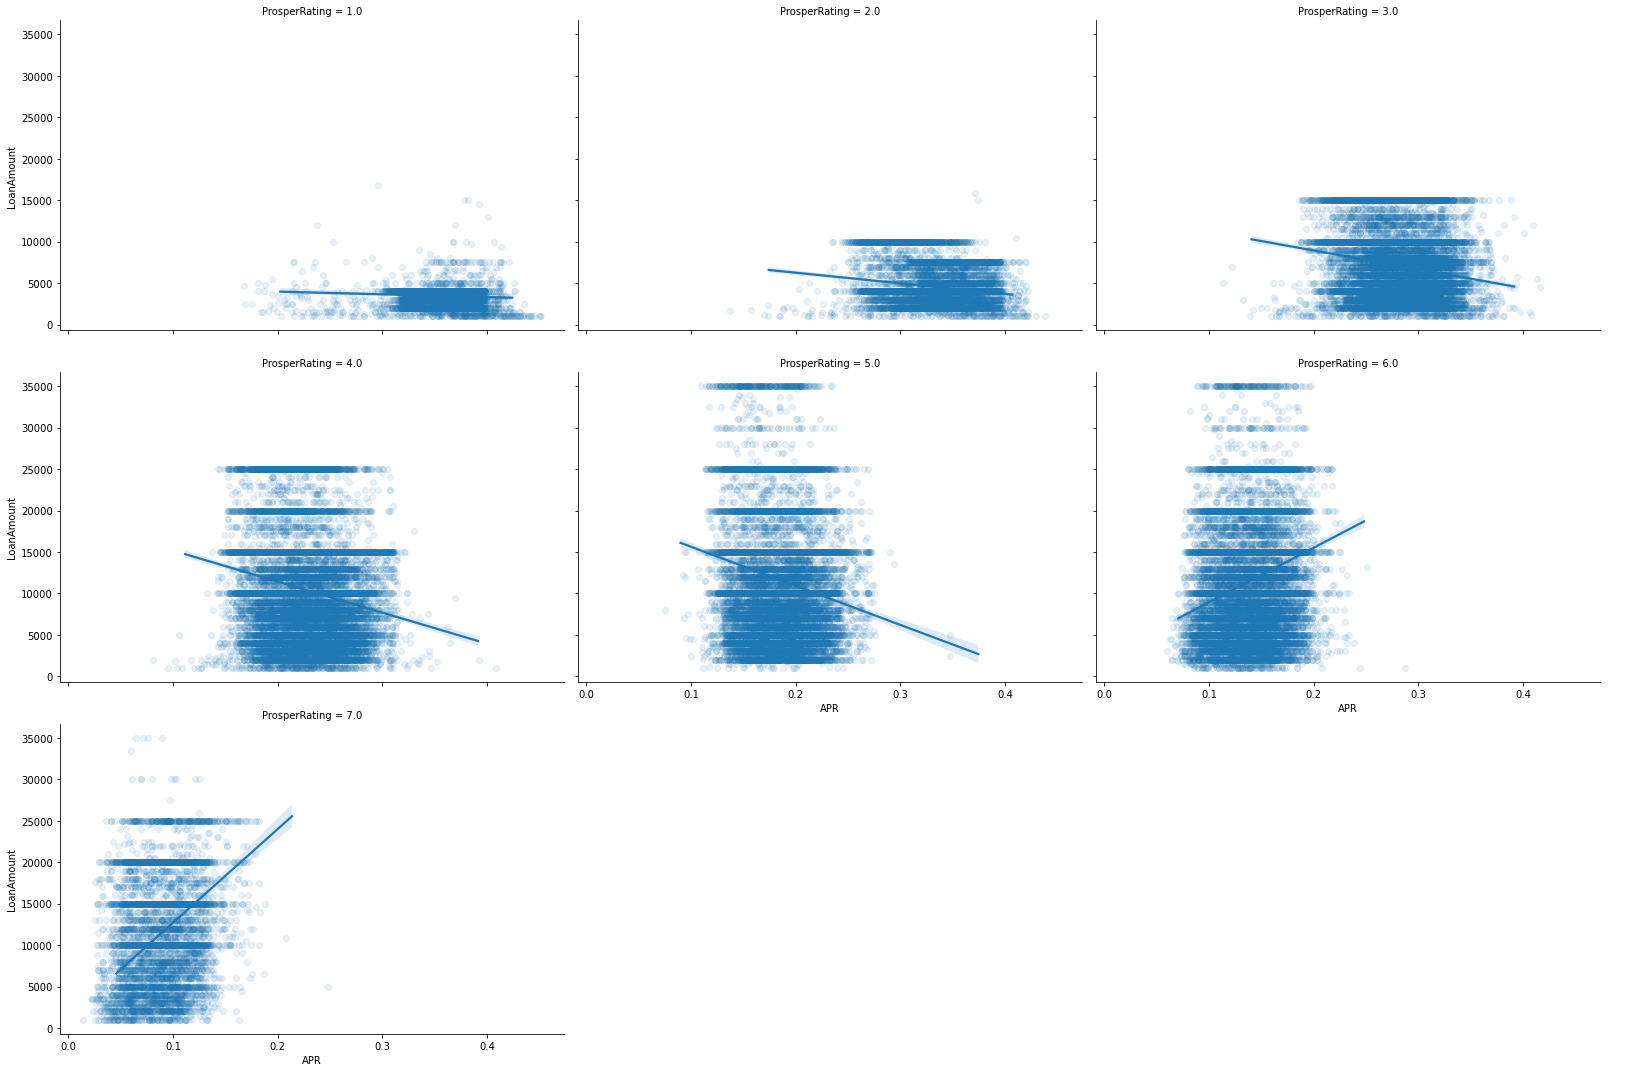

In [32]:
#visualisation
#using faceting grid to show the relationships
g = sns.FacetGrid(data = df, aspect = 1.5, height = 5, col = 'ProsperRating', col_wrap = 3)
g.map(sns.regplot, 'APR', 'LoanAmount', x_jitter = 0.04, scatter_kws = {'alpha': 0.1})
g.add_legend();

#### Observation

These plots show that APR reduces with better ratings while loan amount increases with better ratings. For example, the loan amount at APR 0.2 for 6 and 7 prosper rating are about 2300 and 1500, respectively. However, it was noticed the relationship between loan amount and APR changes from negative to slightly positive at the best ratings (i.e., 6 and 7). This may be because people with these best ratings are super rich and the company wants to maximize their profits by increasing their APR since they (borrowers) would not mind paying them. 

### Question - Is there any relationship between APR, LoanAmount and Recommendations?

In [34]:
df['Recommendations'].value_counts()

0     82306
1      1028
2       156
3        22
5         2
4         2
18        2
19        1
9         1
Name: Recommendations, dtype: int64

In [42]:
#visualization
#using faceting grid to show the relationships
fig = plt.figure(figsize = [25,7])
g = sns.FacetGrid(data = df, col_wrap = 3, height = 3.5, col = 'Recommendations')
g.map(sns.regplot, 'APR', 'LoanAmount', x_jitter = 0.06)
plt.suptitle('Relationship between APR, Loan Amount and Recommendations')
plt.ylabel('Loan Amount')
plt.subplots_adjust(top = 0.9)
plt.xlabel('APR');

<Figure size 1800x504 with 0 Axes>

The results shows that APR reduces as the number of recommendations increases. 

### Question - What is the relationship between APR, Loan Status and Term?

In [90]:
fig = plt.figure(figsize = [25,7])
ax = sns.pointplot(data = df, x = 'LoanStatus', y = 'APR', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.3, ci='sd')
plt.title('Relationship between APR, Loan Status and Term')
plt.ylabel('APR')
ax.set_yticklabels([],minor = True);

#### Observation

This plot shows that past due loans have higher APR mean compared to others. It also shows that the APR increases from term 12 to term 36 and then decrease at term 60 for all the loan status except "defaulted", which its APR decreases from 12 to 60.

### Question - What is the relationship between APR, income range, and term? 

In [91]:
fig = plt.figure(figsize = [25,7])
sns.boxplot(data = df, x='IncomeRange', y='APR', hue = 'Term');
plt.title('Relationship between APR, Income Range and Term')
plt.ylabel('APR')
plt.xlabel('Income Range');

#### Observation

The results indicate that people that are not employed have the highest APR. This is because the loan company considers them to have the highest risk of paying back the loan. Furthermore, it was observed that the APR reduces for each term as the income range increases. This maybe because people with high income range tend to have low risk of paying up. Hence, they have low APR. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It was discovered that APR reduces with better ratings while loan amount increases with better ratings. Moreover, it was discovered that APR reduces as the number of recommendations increases. Further, it was observed that past due loans have higher APR compared to others. Apart from that, the exploration denotes that people that are not employed had the highest APR.

### Were there any interesting or surprising interactions between features?

>  Interestingly, it was noticed that the relationship between loan amount and APR changes from negative to slightly positive at the best ratings (i.e., 6 and 7). This may be becuase people with this best ratings are super rich and the loan company wants to maximize their profit by increasing their APR since they (borrowers) would not mind paying them.

## Conclusions

In this project, the following tentative conclusions could be drawn:

•	The distribution of the Borrowers APR data is multimodal as it contains different peaks. The highest peak lies between 0.35 and 0.36. This suggests that the APR of most of the data is between 35-36%.

•	The income of most of the borrowers ranged between 25,000-49,999 followed by 50,000-74,999.

•	The exploration shows that most of the loans were made for 36 months and the prosper ratings of the borrowers follows a normal distribution.

•	Based on correlation analysis, APR is strongly correlated with InterestRate (r = 0.993). Moreover, APR is negatively correlated with LoanAmount (r= -0.428). This is intuitively okay since huge amount of loan should attract lesser APR.

•	The analysis shows that APR is negatively correlated with prosper rating, prosper score, and recommendations. These observations make sense since APR of borrowers that have low risk (i.e., high rating and score) are expected to be low. The same judgement is applicable to recommendations.

•	The exploration shows that APR reduces with term. This means loan with longer term will attract lesser APR. It is also noticed that the loan amount increases with income range. This is reasonable as people with higher income rate should have low risk, hence, they should be able to pay back the loan easily. This observation is confirmed by the relationship between prosper score, prosper rating and income range : the more the income the more the prosper score and prosper rating. However, there is a surprising relationship between prosper rating, prosper score and term. Prosper score increases with term, while prosper rating reduces with term. This is surprising as prosper rating and prosper score measures almost the same thing : risk level of borrowers.

•	The visualization result depicts that current and completed loans have lower APR (mean) compared to those of past due loans. This typifies that people that do not pay up their loans at the right time may get their APR increased.

•	It was discovered that APR reduces with better ratings while loan amount increases with better ratings. For example, the loan amount at APR 0.2 for 6 and 7 prosper rating are about 2300 and 1500, respectively. However, it was noticed the relationship between loan amount and APR changes from negative to slightly positive at the best ratings (i.e., 6 and 7). This may be because people with these best ratings are super rich and the company wants to maximize their profit by increasing their APR since they (borrowers) would not mind paying them.

•	The analysis identifies that past due loans have higher APR mean compared to others. It also shows that the APR increases from term 12 to term 36 and then decrease at term 60 for all the loan status except "defaulted", which its APR decreases from 12 to 60.

•	The result shows that people that are not employed have the highest APR. This is because the loan company considers them to have the highest risk of paying back the loan. Furthermore, it was observed that the APR reduces for each term as the income range increases. This maybe because people with high income range tend to have low risk of paying up. Hence, they have low APR.

